In [9]:
# Importing libraries 
import numpy as np 
import pandas as pd
import janitor
import sklearn 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv('../data/mushrooms.csv')

In [11]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
data.columns # We want to clean column names automatically by replacing each - with _

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
labels = ['Edible', 'Poisonous']
values = [data.describe()['class']['freq'], data.describe()['class']['count']-data.describe()['class']['freq']]
colors = ['green', 'pink']

Text(0.5, 1.0, 'Mushrooms Classes vs Gill Attachments')

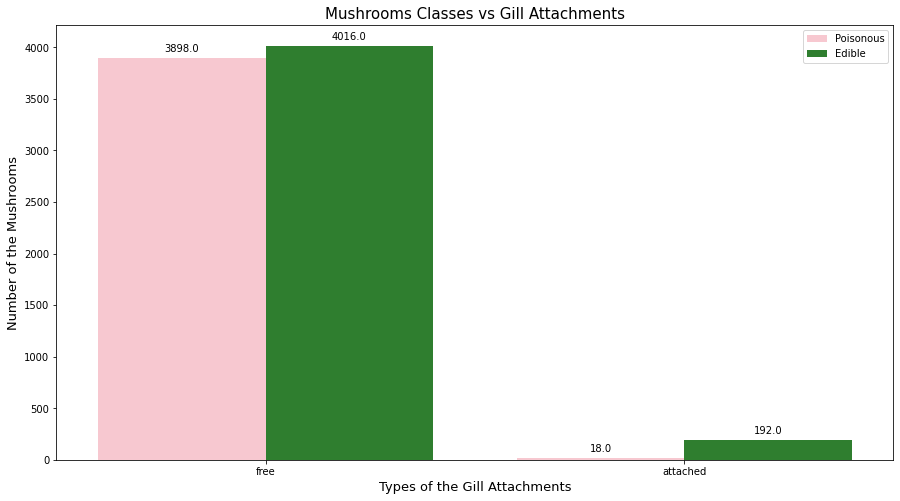

In [40]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-attachment',
                      hue='class',
                      order=data['gill-attachment'].value_counts().index,
                      palette=['pink', 'forestgreen'])                      
splot.set_xticklabels(['free', 'attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('Types of the Gill Attachments', fontsize=13)
plt.title('Mushrooms Classes vs Gill Attachments', fontsize=15)

 According to this graph, the Free type gill attachments are approximately equally distributed. In contrast, the Attached type gill attachments are most frequently edible.

Text(0.5, 1.0, 'Mushrooms Classes vs Gill Spacing')

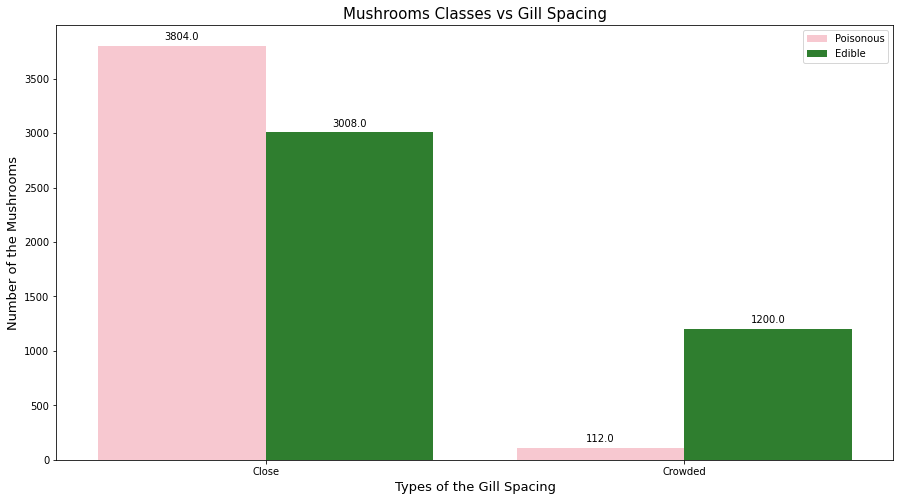

In [41]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-spacing',
                      hue='class',
                      order=data['gill-spacing'].value_counts().index,
                      palette=['pink', 'forestgreen'])                   
splot.set_xticklabels(['Close', 'Crowded'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('Types of the Gill Spacing', fontsize=13)
plt.title('Mushrooms Classes vs Gill Spacing', fontsize=15)

 According to this figure, when the Crowded type gill spacing is high it is frequently edible.however, we cannot say the same thing for the Close-type gill spacing mushrooms. Their class distribution by gill spacing is pretty close to each other.

Text(0.5, 1.0, 'Mushrooms vs Gill Colors')

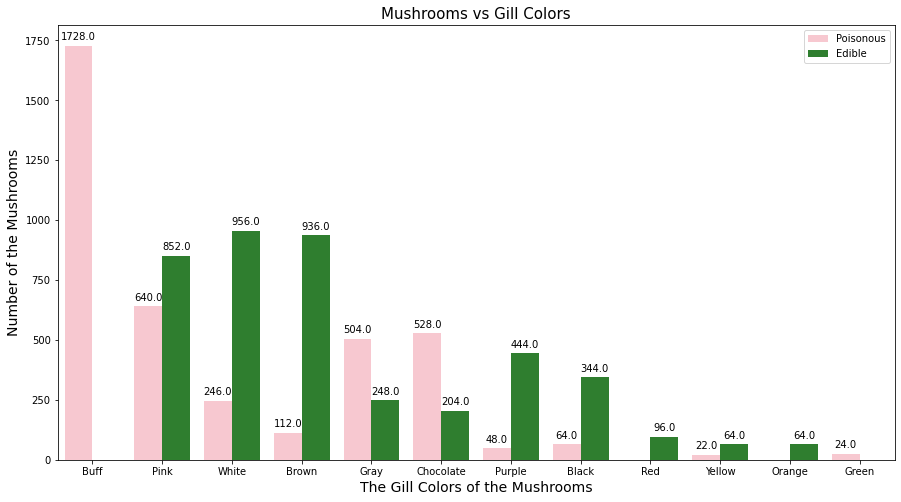

In [42]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-color',
                      hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['pink', 'forestgreen'])
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=13)
plt.title('Mushrooms vs Gill Colors', fontsize=15)

 As we can see from the figure above, the Buff-colored gills are highly poisonous. In contrast, the White, Brown, Purple, Black, and Red gill colors are high frequently edible.